# Time Based Analysis
- I want to examine my listening habits through the time they occur
- Find insights into when I'm most engaged with music

## Load & Prepare Data

Load all the relevant JSON files and prepare the dataset for time-based analysis.


In [30]:
import pandas as pd
import os

# Load your actual Spotify data
data_path = '../data/Spotify Extended Streaming History'
dfs = []

# Load all streaming history JSONs except any unrelated files (like genre map)
for file in os.listdir(data_path):
    if file.endswith('.json') and file != 'artist_genre_map.json':
        dfs.append(pd.read_json(os.path.join(data_path, file)))

# Combine all files into one DataFrame
df = pd.concat(dfs, ignore_index=True)

# Convert timestamp column
df['ts'] = pd.to_datetime(df['ts'])

# Extract time features
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['day'] = df['ts'].dt.day
df['hour'] = df['ts'].dt.hour
df['weekday'] = df['ts'].dt.day_name()

# Rename key columns for consistency
df.rename(columns={
    'master_metadata_album_artist_name': 'artist',
    'master_metadata_track_name': 'track'
}, inplace=True)

# Preview basic info
print(f"Loaded {len(df):,} plays from your streaming history.")
print(f"Year range: {df['year'].min()} – {df['year'].max()}")
print(f"Unique tracks: {df['track'].nunique()}")
print(f"Unique artists: {df['artist'].nunique()}")


Loaded 238,965 plays from your streaming history.
Year range: 2018 – 2025
Unique tracks: 17913
Unique artists: 5251


## Listening Frequency by Hour of Day

This histogram shows what times of day I listen to the most music.

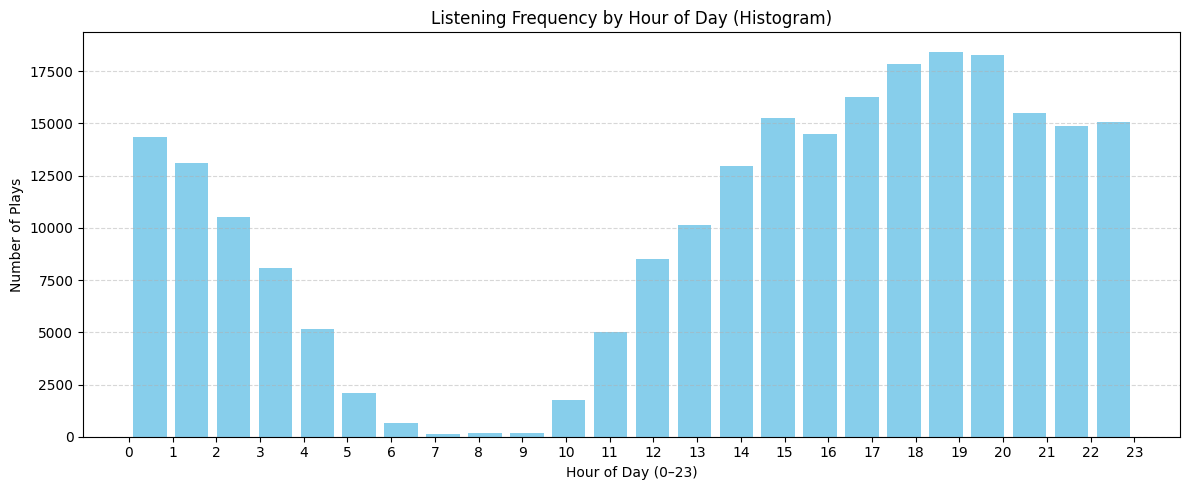

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
df['hour'].plot(kind='hist', bins=24, rwidth=0.8, color='skyblue')
plt.title("Listening Frequency by Hour of Day (Histogram)")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Plays")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Weekday vs Weekend Listening (Stacked Bar)

Compare listening behavior between weekdays and weekends for each day of the week.

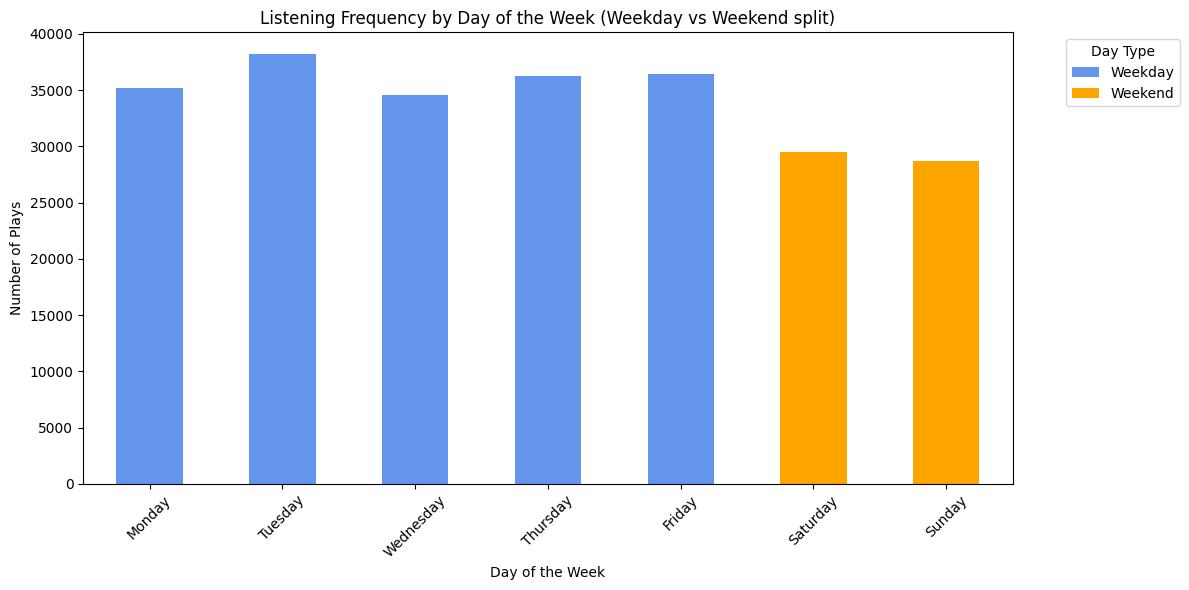

In [32]:
# Define the correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['ts'].dt.day_name(), categories=day_order, ordered=True)

# Classify each play as Weekday or Weekend
df['day_type'] = df['weekday'].isin(['Saturday', 'Sunday']).map({True: 'Weekend', False: 'Weekday'})

# Group by weekday and day_type
day_weekend_counts = df.groupby(['weekday', 'day_type'], observed=False).size().unstack(fill_value=0)

# Reorder index to ensure Saturday and Sunday are last
day_weekend_counts = day_weekend_counts.reindex(day_order)

# Plot stacked bar chart
day_weekend_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['cornflowerblue', 'orange'])

plt.title("Listening Frequency by Day of the Week (Weekday vs Weekend split)")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.legend(title='Day Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Listening Frequency by Hour and Day of the Week
- I learned through this that my most active listening times are weekdays from 5:00 PM to 8:00 PM, which lines up perfectly to when I am most likely at the gym
- I tend to not listen to as much music from 1:00 AM to 12:00 PM, as these hours are mostly taken by sleeping and getting ready for my day
- The weekend I am not listening as much either, mostly from not being at work or the gym

## Monthly Listening Trend Over Years

Track how your overall listening volume changes month by month across years.

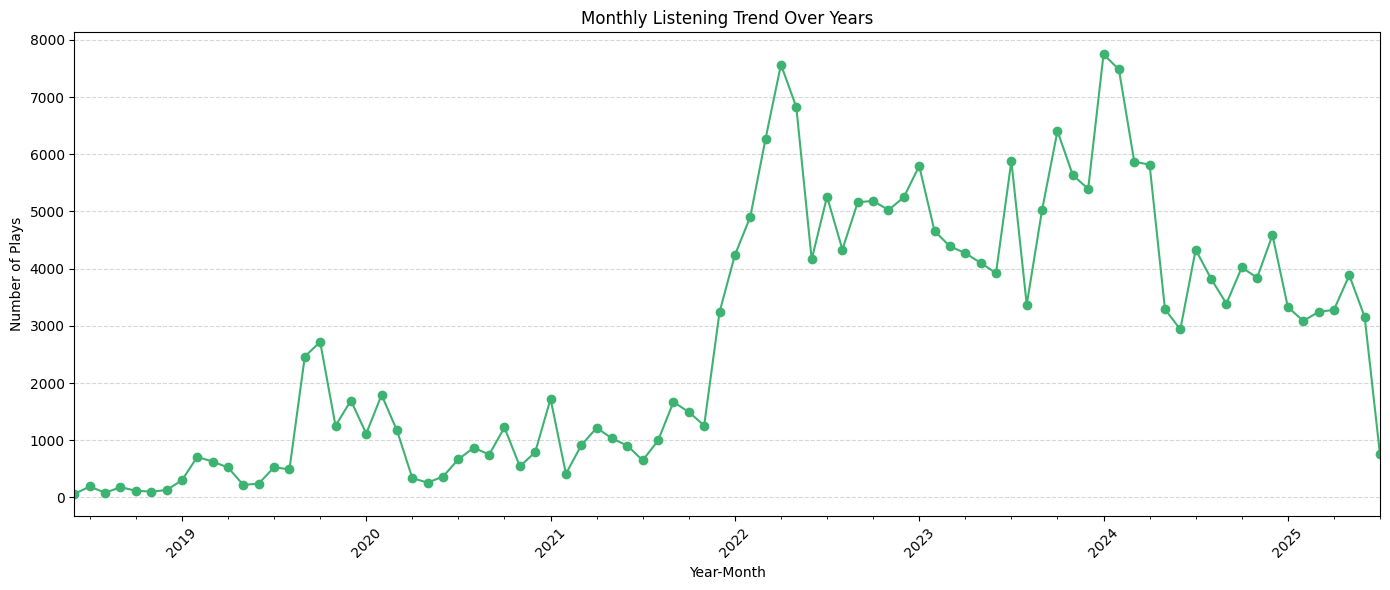

In [33]:
# Remove timezone information before converting to period
df['year_month'] = df['ts'].dt.tz_localize(None).dt.to_period('M')

# Group by year_month and count plays
monthly_counts = df.groupby('year_month').size()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', marker='o', color='mediumseagreen')
plt.title("Monthly Listening Trend Over Years")
plt.xlabel("Year-Month")
plt.ylabel("Number of Plays")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Monthly Listening Trend Over Years
- The first thing I am noticing about the graph is the large spikes around the start of 2022 and 2024
    - 2022 being when I was entering senior year and starting to really get interested in music
    - 2024 was my first year of college and when my roommates showed me even more music that broadened my taste
- I am noticing a drop off in the past year, as I have been busy like I have never been before so I have had less and less time to listen to music

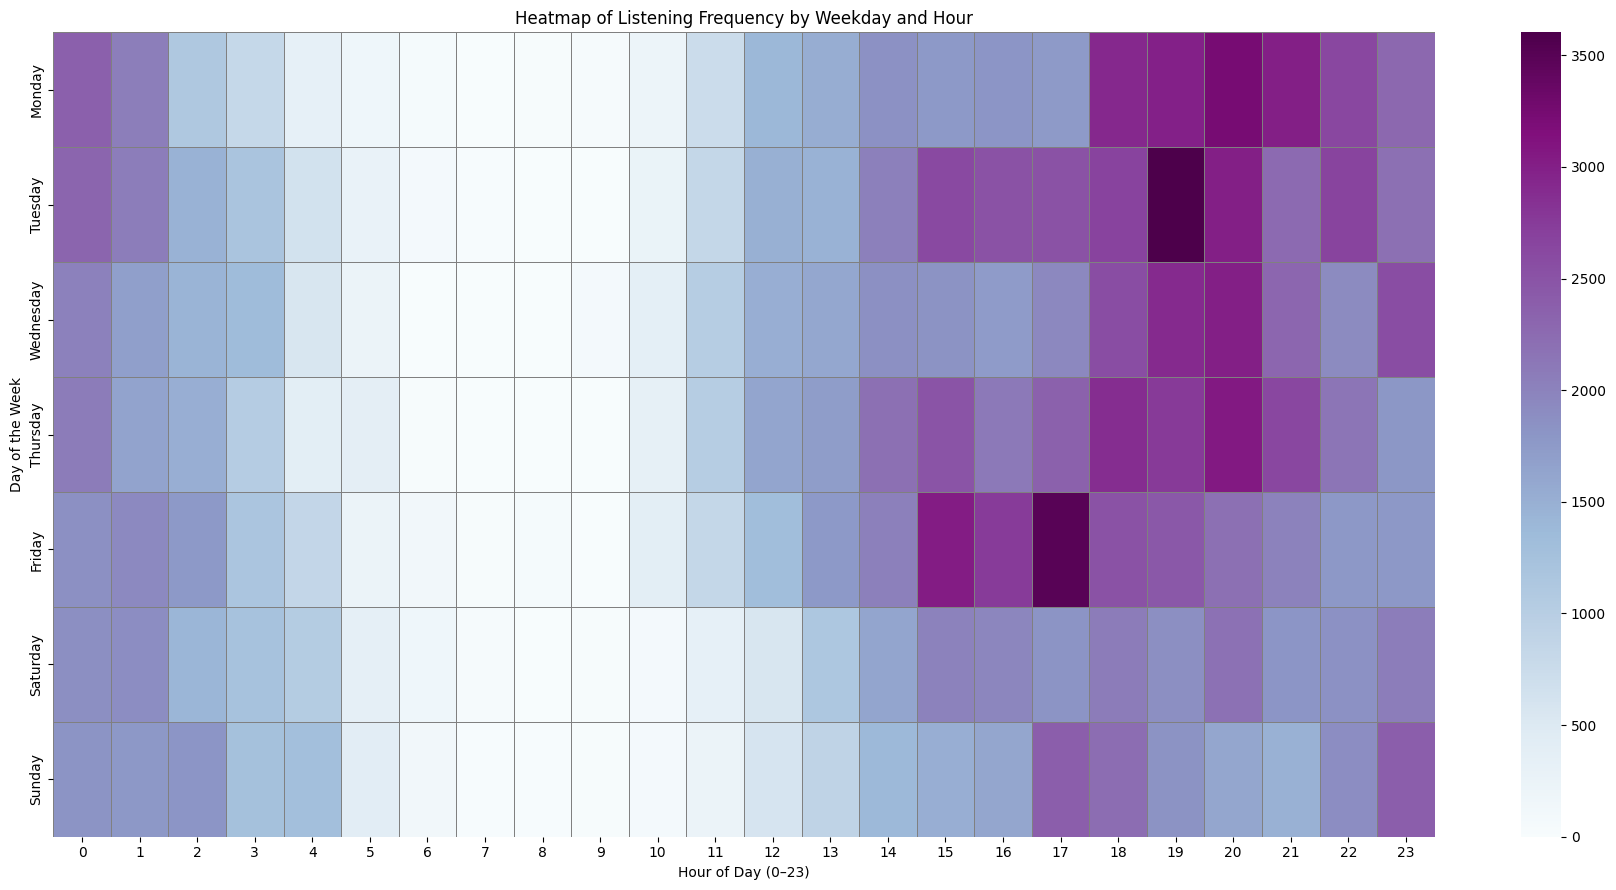

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['ts'].dt.day_name(), categories=day_order, ordered=True)

# Group by weekday and hour with observed=False to avoid future warning
heatmap_data = df.groupby(['weekday', 'hour'], observed=False).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(18, 9))
sns.heatmap(heatmap_data.loc[day_order], cmap='BuPu', linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Listening Frequency by Weekday and Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()


## Heatmap of Listening Frequency by Weekday and Hour
- A majority of my listening is being done around the hours of 7:00 to 8:00 PM
- Friday is the last consistent day, having its peak at 5:00 PM
- The weekend is the most speratic of the days, not having a significant peak hour for neither Saturday nor Sunday